In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

## Cleaning of data and visualisation

In [3]:
#Clean data

#a = np.array([[3.0,8.0,5.0,-999.0,1.0],[7.0,4.0,1.0,2.0,6.0]])

#remove -999 to the mean of the colum
for column in tX.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
tX_clean = tX
for column in tX_clean.T:
    mean = np.mean(column)
    var = np.var(column)
    if(var == 0):
        var =1
    column[:] = (column[:] - mean)/var
    
#tX_clean = np.c_[np.ones(len(y)),tX_clean]

In [4]:
#split data
ratio = 0.8
#60% train, 20%test, 20%cross

test_x = np.array([1,2,3,4,5,6,7,8,9,10])
test_y = np.array([1,1,1,1,1,-1,1,-1,-1,-1])
#x_train, x_test, y_train,y_test  = split_data(test_y,test_x,ratio)

x_train, x_test, y_train,y_test = split_data(y,tX_clean,ratio)


/Users/Mick/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


## Test of the different methods

In [5]:
#*********************** least squares *******************#
#mse,weight = least_squares(y,tX)
mse_train,weight = least_squares(y_train,x_train)
mse_test = compute_loss(y_test,x_test,weight)
print("mse train",mse_train)
print("mse test",mse_test)

mse train 0.390274194423
mse test 0.388536456197


In [6]:
#******************** gradient descent *******************#
w_initial = np.zeros([tX.shape[1]])
max_iters = 500
gamma = 0.08
mse,weight = least_squares_GD(y_train,x_train,w_initial,max_iters,gamma)
print(mse)
print(weight)

0.431557975106
[ -1.56872990e-02  -1.77467339e-01  -2.23129267e-02   5.28241154e-02
   7.38142343e-02   6.05938350e-03  -5.58950539e-02   6.99799884e-02
  -6.89922633e-02   2.20582638e-02  -1.44904682e-01   2.73373001e-01
   1.76367922e-02   1.87879070e-01  -7.71996721e-04  -3.67153246e-03
   1.37182515e-01  -1.51167199e-03   2.35028825e-03   1.02035705e-02
   7.07541588e-03   1.33374917e-02   5.61119888e-02   6.09354768e-02
  -3.41629615e-05   4.74992022e-04  -5.15019289e-03   2.53748782e-03
   4.27539944e-04   1.39640152e-02]


In [7]:
#************** stochastic gradient descent ****************#
w_initial = np.zeros([x_train.shape[1]])
batch_size = 32
max_iters = 1000
gamma = 0.01
mse_SGD,weight_SGD = least_squares_SGD(y_train,x_train,w_initial,batch_size,max_iters,gamma)
print(mse_SGD)
print(weight)

0.41435125529
[ -1.56872990e-02  -1.77467339e-01  -2.23129267e-02   5.28241154e-02
   7.38142343e-02   6.05938350e-03  -5.58950539e-02   6.99799884e-02
  -6.89922633e-02   2.20582638e-02  -1.44904682e-01   2.73373001e-01
   1.76367922e-02   1.87879070e-01  -7.71996721e-04  -3.67153246e-03
   1.37182515e-01  -1.51167199e-03   2.35028825e-03   1.02035705e-02
   7.07541588e-03   1.33374917e-02   5.61119888e-02   6.09354768e-02
  -3.41629615e-05   4.74992022e-04  -5.15019289e-03   2.53748782e-03
   4.27539944e-04   1.39640152e-02]


# ridge regression

degree:  1
1 --> 0.381247375694  AND  0.381330943311
degree:  2
2 --> 0.35458740602  AND  0.35480196142
degree:  3
3 --> 0.349025949331  AND  0.349697868922
degree:  4
4 --> 0.346467256911  AND  0.346769725944
degree:  5
5 --> 0.344178459753  AND  0.344626926295
degree:  6
6 --> 0.343825372772  AND  0.347472208753
degree:  7
7 --> 0.342479663215  AND  0.44141299744


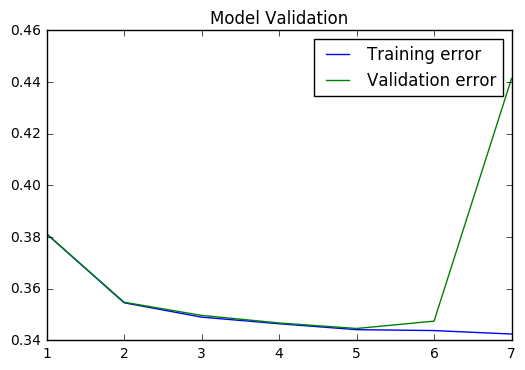

In [ ]:
#model validation

degrees = range(1,8)
k_fold = 4
lambda_ = 0.01
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for degree in degrees:
    print("degree: ",degree)
    
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]

        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lambda_)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(degree,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
    
p = plt.plot(degrees,mean_train_mse,degrees,mean_cv_mse)
plt.title("Model Validation") 
plt.legend(p, ["Training error","Validation error"])
plt.show()


In [ ]:
#lambda validation

lambdas = np.logspace(-3, -2, 10)
k_fold = 4
degree = 5
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for lamb in lambdas:
    print("labda: ",lamb)
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]
    
        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lamb)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(lamb,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
        
    
p=plt.semilogx(lambdas,mean_train_mse,lambdas,mean_cv_mse)
plt.title("Lambda validation") 
plt.legend(p, ["Training error","Validation error"])
plt.xlabel('Lambdas')
plt.ylabel('mse')
plt.show()


labda:  0.001
0.001 --> 0.336426206506  AND  0.356183957817
labda:  0.00129154966501
0.00129154966501 --> 0.33772698051  AND  0.3491844648
labda:  0.0016681005372
0.0016681005372 --> 0.338889044888  AND  0.345597992722
labda:  0.00215443469003
0.00215443469003 --> 0.339915040009  AND  0.343907656648
labda:  0.00278255940221
0.00278255940221 --> 0.340816400481  AND  0.343251705183
labda:  0.0035938136638
0.0035938136638 --> 0.341610945919  AND  0.343150404089
labda:  0.00464158883361
0.00464158883361 --> 0.342320638476  AND  0.343342973956
labda:  0.00599484250319


In [ ]:
#************** logistic regression ****************#
max_iters = 1
gamma = 0.000001
lambda_ = 0.016
mse,weight = reg_logistic_regression(y_test, x_test, lambda_, gamma, max_iters)
print(mse)
print(weight)

In [ ]:
#best parameters
lambda_ = 0.00303919538231
degree = 5

x_train_poly = build_poly(x_train,degree)
x_test_poly = build_poly(x_test,degree)

mse_train,weight = ridge_regression(y_train,x_train_poly, lambda_)
mse_test = compute_loss(y_test,x_test_poly,weight)
print("mse train",mse_train)
print("mse test",mse_test)

## Test of methods

In [ ]:
#calculate pourcentage of prediction
y_pred = predict_labels(weight, x_test_poly)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
weights = weight
tX_test = build_poly(tX_test,5)

OUTPUT_PATH = '../submission.csv' #  fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)